In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
cust = pd.read_csv("D:\\fifth semester\\project MPIT\\projrct csv\\best dataset\\customer_shopping_data.csv")
print(cust.columns)

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')


In [3]:
cust.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [4]:
cust.shape

(99457, 10)

In [5]:
cust.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

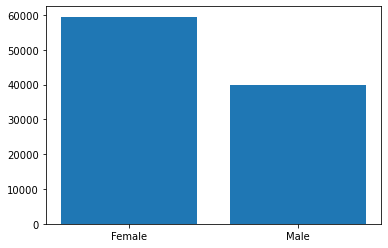

In [6]:
gender = cust["gender"].value_counts()
plt.bar(gender.index,gender)
plt.show()

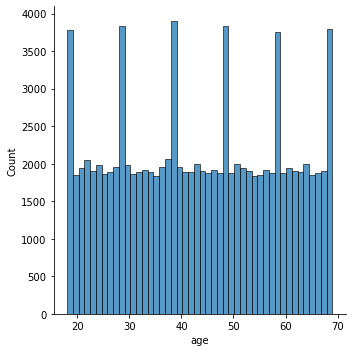

In [7]:
age = cust['age']
sns.displot(age,kde = False)
plt.show()

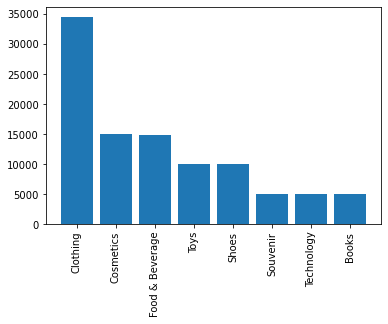

In [8]:
cat = cust["category"].value_counts()
plt.bar(cat.index,cat)
plt.xticks(rotation = 90)
plt.show()

In [9]:
cash = cust['payment_method'].value_counts()
cashi = cash.index
dats = pd.DataFrame({'cash_meth':cashi,'numbers':cash})
dats


,cash_meth,numbers
Cash,Cash,44447
Credit Card,Credit Card,34931
Debit Card,Debit Card,20079


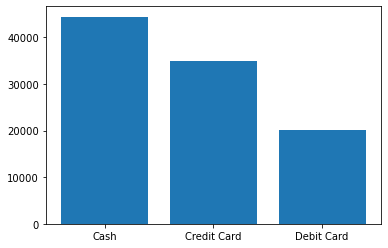

In [10]:
plt.bar(cash.index,cash)
plt.show()

In [11]:
gh = cust.groupby(["gender"])['category'].value_counts()
datag = pd.DataFrame(gh)
datag

category
gender category                 
Female Clothing            20652
       Cosmetics            9070
       Food & Beverage      8804
       Toys                 6085
       Shoes                5967
       Souvenir             3017
       Technology           2981
       Books                2906
Male   Clothing            13835
       Cosmetics            6027
       Food & Beverage      5972
       Shoes                4067
       Toys                 4002
       Books                2075
       Technology           2015
       Souvenir             1982

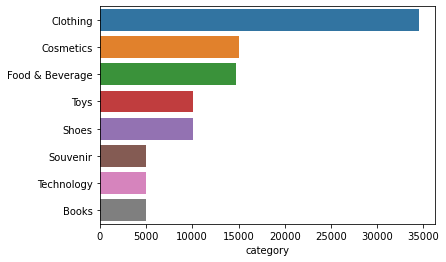

In [12]:
x = cust['category'].value_counts()
y = x.index
sns.barplot(x = x,y = y ,data = cust)
plt.show()

In [13]:
cust.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [14]:
datav = cust[['category','quantity','payment_method','gender']]

In [15]:
print(datav.head())

   category  quantity payment_method  gender
0  Clothing         5    Credit Card  Female
1     Shoes         3     Debit Card    Male
2  Clothing         1           Cash    Male
3     Shoes         5    Credit Card  Female
4     Books         4           Cash  Female


In [16]:
datax = datav.iloc[:,0:3]
datay = datav.iloc[:,-1]
datax = pd.get_dummies(datax)
print(datax.head())
print(datay.head())

   quantity  category_Books  category_Clothing  category_Cosmetics  \
0         5               0                  1                   0   
1         3               0                  0                   0   
2         1               0                  1                   0   
3         5               0                  0                   0   
4         4               1                  0                   0   

   category_Food & Beverage  category_Shoes  category_Souvenir  \
0                         0               0                  0   
1                         0               1                  0   
2                         0               0                  0   
3                         0               1                  0   
4                         0               0                  0   

   category_Technology  category_Toys  payment_method_Cash  \
0                    0              0                    0   
1                    0              0                    0

# Test Train Split

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(datax,datay,test_size = 0.3)

In [18]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(69619, 12)
(69619,)
(29838, 12)
(29838,)


# Naive Bayes


In [19]:
from sklearn.naive_bayes import GaussianNB
modelgb = GaussianNB()
modelgb.fit(xtrain,ytrain)


GaussianNB()

In [20]:
ypredict1 = modelgb.predict(xtest)
print(ytest.head())
print(ypredict1[0:5])

82914    Female
7508     Female
87826    Female
22414      Male
58678    Female
Name: gender, dtype: object
['Female' 'Female' 'Female' 'Female' 'Female']


In [21]:

accgb = accuracy_score(ytest,ypredict1)
print(accgb)

0.5884107513908439


# Decision Tree classification

In [22]:
from sklearn.tree import DecisionTreeClassifier
modelDTC = DecisionTreeClassifier()
modelDTC.fit(xtrain,ytrain)


DecisionTreeClassifier()

In [23]:
ypredict2 = modelDTC.predict(xtest)
print(ytest.head())
print(ypredict2[0:5])

82914    Female
7508     Female
87826    Female
22414      Male
58678    Female
Name: gender, dtype: object
['Female' 'Female' 'Female' 'Female' 'Female']


In [24]:
accDT = accuracy_score(ypredict2,ytest)
print(accDT)

0.5981299014679268


# Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
modelRf = RandomForestClassifier()
modelRf.fit(xtrain,ytrain)


RandomForestClassifier()

In [26]:
ypredict3 = modelRf.predict(xtest)
print(ytest)
print(ypredict3)

82914    Female
7508     Female
87826    Female
22414      Male
58678    Female
          ...  
58104    Female
66088    Female
48899    Female
90646    Female
93152    Female
Name: gender, Length: 29838, dtype: object
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']


In [27]:
accRfc = accuracy_score(ypredict3,ytest)
print(accRfc)

0.5981299014679268


# SVC


In [ ]:
from sklearn.svm import SVC
modelsvm = SVC(kernel='rbf',random_state=0)
modelsvm.fit(xtrain,ytrain)
ypredict4 = modelsvm.predict(xtest)
print(ytest.head())
print(ypredict4[0:5])

In [ ]:
accsvc = accuracy_score(ypredict4,ytest)
print(accsvc)

In [130]:
from sklearn.neighbors import KNeighborsClassifier
modelknn = KNeighborsClassifier(n_neighbors=5)
modelknn.fit(xtrain,ytrain)
ypredict5 = modelknn.predict(xtest)
print(ytest.head())
print(ypredict5[0:5])
acckn = accuracy_score(ypredict5,ytest)
print(acckn)

34541      Male
40359    Female
77759    Female
7377     Female
52906      Male
Name: gender, dtype: object
['Male' 'Male' 'Female' 'Male' 'Female']
0.5198404718814934


In [131]:
datavb = pd.DataFrame({
    "Model":["Naive Bayes","Decision Tree","Random Forest","SVC"],
    "Accuracy score":[accgb,accDT,accRfc,accsvc]
})
datavb = datavb.sort_values(by = "Accuracy score",ascending=False)
print(datavb)

           Model  Accuracy score
1  Decision Tree        0.601347
2  Random Forest        0.601347
3            SVC        0.601347
0    Naive Bayes        0.592768
